<a href="https://www.kaggle.com/code/shubhamjaiswal4/cassandra-20-march?scriptVersionId=91005785" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [234]:
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import torch

In [235]:
train_df = pd.read_csv("../input/cassandra-mock-round/train.csv",index_col = "id")
test = pd.read_csv("../input/cassandra-mock-round/test.csv",index_col = "id")
y = train_df['Count']
train = train_df.drop('Count',axis = 1)

In [236]:
train.head(10)

,Date,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day
id,,,,,,,,,,,,
1,05/08/2018,6:00,300.3,83,5.04,1080,0.00,0.0,0.0,Summer,NO,YES
2,21/01/2018,23:00,272.6,32,2.16,2000,0.00,0.0,0.0,Winter,NO,YES
3,11/05/2018,6:00,285.0,83,1.44,321,0.01,0.0,0.0,Spring,NO,YES
4,05/07/2018,13:00,301.1,67,3.96,1772,1.43,0.0,0.0,Summer,NO,YES
5,02/01/2018,5:00,269.9,67,2.16,1384,0.00,0.0,0.0,Winter,NO,YES
6,09/08/2018,22:00,300.5,82,1.44,1228,0.00,0.0,0.0,Summer,NO,YES
7,15/09/2018,1:00,294.8,79,5.04,2000,0.00,0.0,0.0,Autumn,NO,YES
8,12/06/2018,12:00,297.0,51,6.48,2000,2.29,0.0,0.0,Summer,NO,YES
9,20/09/2018,0:00,293.1,58,1.08,2000,0.00,0.0,0.0,Autumn,NO,YES


In [237]:
test.head(10)

,Date,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day
id,,,,,,,,,,,,
4987,10/06/2018,16:00,297.8,51,5.76,2000,1.17,0.0,0.0,Summer,NO,YES
4988,21/01/2018,4:00,270.7,47,2.52,984,0.00,0.0,0.0,Winter,NO,YES
4989,13/12/2017,2:00,262.6,53,6.48,1949,0.00,0.0,0.0,Winter,NO,YES
4990,07/03/2018,0:00,275.8,45,6.12,1493,0.00,0.0,0.0,Spring,NO,YES
4991,20/08/2018,22:00,302.0,63,15.12,1776,0.00,0.0,0.0,Summer,NO,YES
4992,06/10/2018,16:00,294.5,62,12.24,2000,1.26,0.0,0.0,Autumn,NO,YES
4993,02/09/2018,7:00,293.2,65,5.04,2000,0.16,0.0,0.0,Autumn,NO,YES
4994,23/02/2018,23:00,278.5,80,9.72,258,0.00,0.0,0.0,Winter,NO,YES
4995,05/09/2018,9:00,296.4,59,10.80,1974,1.46,0.0,0.0,Autumn,NO,YES


In [238]:
def add_date_features(df):
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    df['day_of_month'] = df['Date'].dt.days_in_month
    df['day_of_week'] = df['Date'].dt.dayofweek
    df['week'] = df['Date'].dt.isocalendar().week
    df['quarter'] = df['Date'].dt.quarter    
    
    
   
   
    return df

In [239]:
df = pd.concat([test.assign(ind = "test"), train.assign(ind = "train")])

In [240]:
df

,Date,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day,ind
id,,,,,,,,,,,,,
4987,10/06/2018,16:00,297.8,51,5.76,2000,1.17,0.0,0.0,Summer,NO,YES,test
4988,21/01/2018,4:00,270.7,47,2.52,984,0.00,0.0,0.0,Winter,NO,YES,test
4989,13/12/2017,2:00,262.6,53,6.48,1949,0.00,0.0,0.0,Winter,NO,YES,test
4990,07/03/2018,0:00,275.8,45,6.12,1493,0.00,0.0,0.0,Spring,NO,YES,test
4991,20/08/2018,22:00,302.0,63,15.12,1776,0.00,0.0,0.0,Summer,NO,YES,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,21/07/2018,19:00,306.4,51,9.36,2000,0.59,0.0,0.0,Summer,NO,YES,train
4983,19/03/2018,19:00,281.4,51,11.88,1977,0.01,0.0,0.0,Spring,NO,YES,train
4984,03/10/2018,13:00,295.5,40,9.36,1854,2.64,0.0,0.0,Autumn,YES,YES,train


In [241]:
df['Date']= pd.to_datetime(df['Date'])


In [242]:
df_with_date = add_date_features(df).drop('Date',axis = 1)


In [243]:
df_with_date

,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day,ind,year,month,day,day_of_month,day_of_week,week,quarter
id,,,,,,,,,,,,,,,,,,,
4987,16:00,297.8,51,5.76,2000,1.17,0.0,0.0,Summer,NO,YES,test,2018,10,6,31,5,40,4
4988,4:00,270.7,47,2.52,984,0.00,0.0,0.0,Winter,NO,YES,test,2018,1,21,31,6,3,1
4989,2:00,262.6,53,6.48,1949,0.00,0.0,0.0,Winter,NO,YES,test,2017,12,13,31,2,50,4
4990,0:00,275.8,45,6.12,1493,0.00,0.0,0.0,Spring,NO,YES,test,2018,7,3,31,1,27,3
4991,22:00,302.0,63,15.12,1776,0.00,0.0,0.0,Summer,NO,YES,test,2018,8,20,31,0,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,19:00,306.4,51,9.36,2000,0.59,0.0,0.0,Summer,NO,YES,train,2018,7,21,31,5,29,3
4983,19:00,281.4,51,11.88,1977,0.01,0.0,0.0,Spring,NO,YES,train,2018,3,19,31,0,12,1
4984,13:00,295.5,40,9.36,1854,2.64,0.0,0.0,Autumn,YES,YES,train,2018,3,10,31,5,10,1


In [244]:
object_cols = ['Seasons','Holiday','Working Day','Hour',]

In [245]:
from sklearn.preprocessing import OrdinalEncoder
# Make copy to avoid changing original data
label_df = df.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

label_df


,Date,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day,ind,year,month,day,day_of_month,day_of_week,week,quarter
id,,,,,,,,,,,,,,,,,,,,
4987,2018-10-06,7.0,297.8,51,5.76,2000,1.17,0.0,0.0,2.0,0.0,1.0,test,2018,10,6,31,5,40,4
4988,2018-01-21,18.0,270.7,47,2.52,984,0.00,0.0,0.0,3.0,0.0,1.0,test,2018,1,21,31,6,3,1
4989,2017-12-13,16.0,262.6,53,6.48,1949,0.00,0.0,0.0,3.0,0.0,1.0,test,2017,12,13,31,2,50,4
4990,2018-07-03,0.0,275.8,45,6.12,1493,0.00,0.0,0.0,1.0,0.0,1.0,test,2018,7,3,31,1,27,3
4991,2018-08-20,14.0,302.0,63,15.12,1776,0.00,0.0,0.0,2.0,0.0,1.0,test,2018,8,20,31,0,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,2018-07-21,10.0,306.4,51,9.36,2000,0.59,0.0,0.0,2.0,0.0,1.0,train,2018,7,21,31,5,29,3
4983,2018-03-19,10.0,281.4,51,11.88,1977,0.01,0.0,0.0,1.0,0.0,1.0,train,2018,3,19,31,0,12,1
4984,2018-03-10,4.0,295.5,40,9.36,1854,2.64,0.0,0.0,0.0,1.0,1.0,train,2018,3,10,31,5,10,1


In [246]:
label_df

,Date,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day,ind,year,month,day,day_of_month,day_of_week,week,quarter
id,,,,,,,,,,,,,,,,,,,,
4987,2018-10-06,7.0,297.8,51,5.76,2000,1.17,0.0,0.0,2.0,0.0,1.0,test,2018,10,6,31,5,40,4
4988,2018-01-21,18.0,270.7,47,2.52,984,0.00,0.0,0.0,3.0,0.0,1.0,test,2018,1,21,31,6,3,1
4989,2017-12-13,16.0,262.6,53,6.48,1949,0.00,0.0,0.0,3.0,0.0,1.0,test,2017,12,13,31,2,50,4
4990,2018-07-03,0.0,275.8,45,6.12,1493,0.00,0.0,0.0,1.0,0.0,1.0,test,2018,7,3,31,1,27,3
4991,2018-08-20,14.0,302.0,63,15.12,1776,0.00,0.0,0.0,2.0,0.0,1.0,test,2018,8,20,31,0,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,2018-07-21,10.0,306.4,51,9.36,2000,0.59,0.0,0.0,2.0,0.0,1.0,train,2018,7,21,31,5,29,3
4983,2018-03-19,10.0,281.4,51,11.88,1977,0.01,0.0,0.0,1.0,0.0,1.0,train,2018,3,19,31,0,12,1
4984,2018-03-10,4.0,295.5,40,9.36,1854,2.64,0.0,0.0,0.0,1.0,1.0,train,2018,3,10,31,5,10,1


In [247]:
trainplt = label_df[label_df['ind'].eq('train')]
trainplt

,Date,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day,ind,year,month,day,day_of_month,day_of_week,week,quarter
id,,,,,,,,,,,,,,,,,,,,
1,2018-05-08,20.0,300.3,83,5.04,1080,0.00,0.0,0.0,2.0,0.0,1.0,train,2018,5,8,31,1,19,2
2,2018-01-21,15.0,272.6,32,2.16,2000,0.00,0.0,0.0,3.0,0.0,1.0,train,2018,1,21,31,6,3,1
3,2018-11-05,20.0,285.0,83,1.44,321,0.01,0.0,0.0,1.0,0.0,1.0,train,2018,11,5,30,0,45,4
4,2018-05-07,4.0,301.1,67,3.96,1772,1.43,0.0,0.0,2.0,0.0,1.0,train,2018,5,7,31,0,19,2
5,2018-02-01,19.0,269.9,67,2.16,1384,0.00,0.0,0.0,3.0,0.0,1.0,train,2018,2,1,28,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,2018-07-21,10.0,306.4,51,9.36,2000,0.59,0.0,0.0,2.0,0.0,1.0,train,2018,7,21,31,5,29,3
4983,2018-03-19,10.0,281.4,51,11.88,1977,0.01,0.0,0.0,1.0,0.0,1.0,train,2018,3,19,31,0,12,1
4984,2018-03-10,4.0,295.5,40,9.36,1854,2.64,0.0,0.0,0.0,1.0,1.0,train,2018,3,10,31,5,10,1


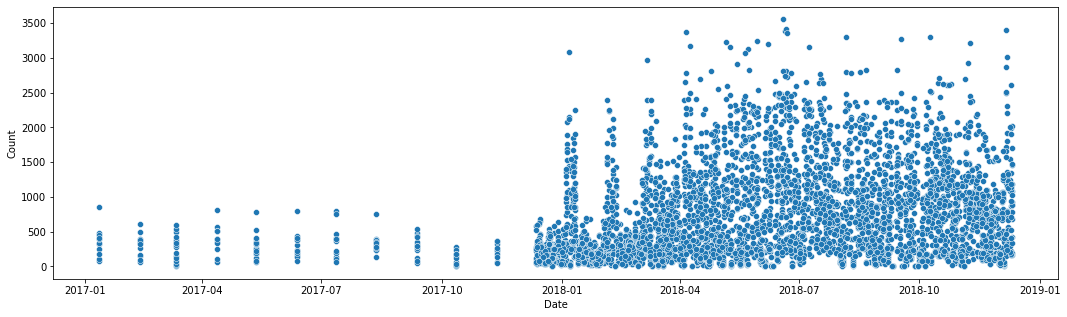

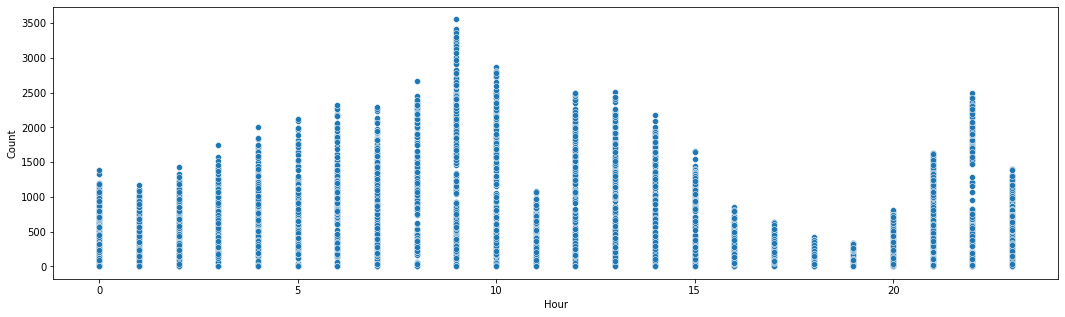

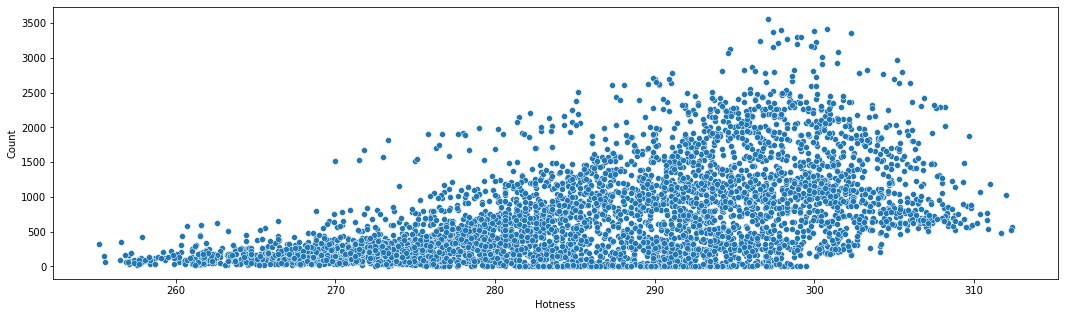

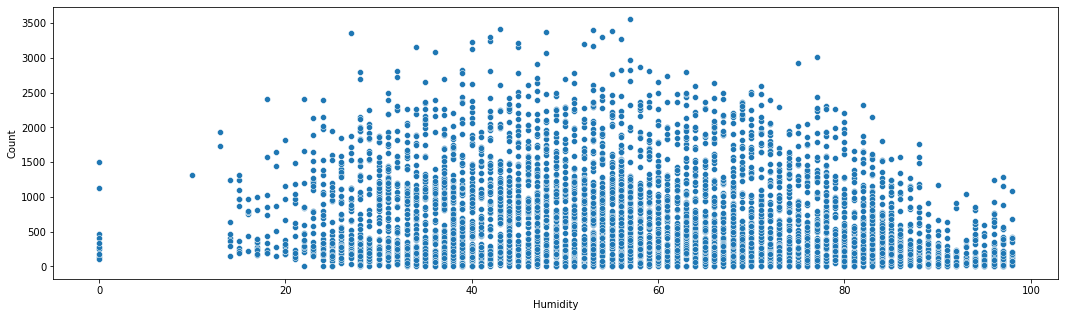

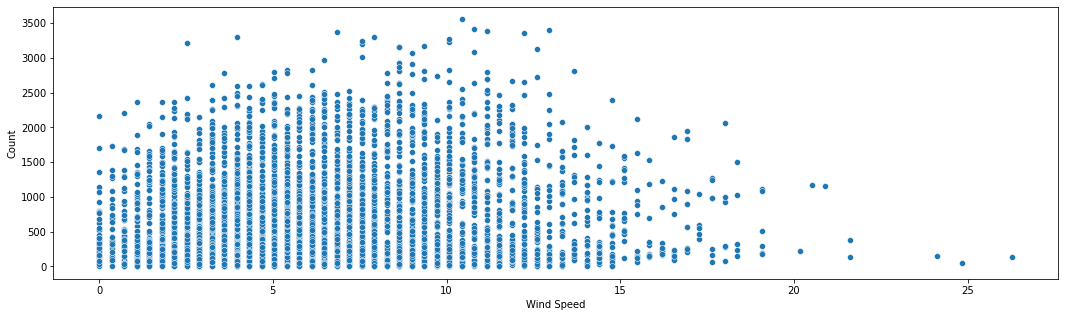

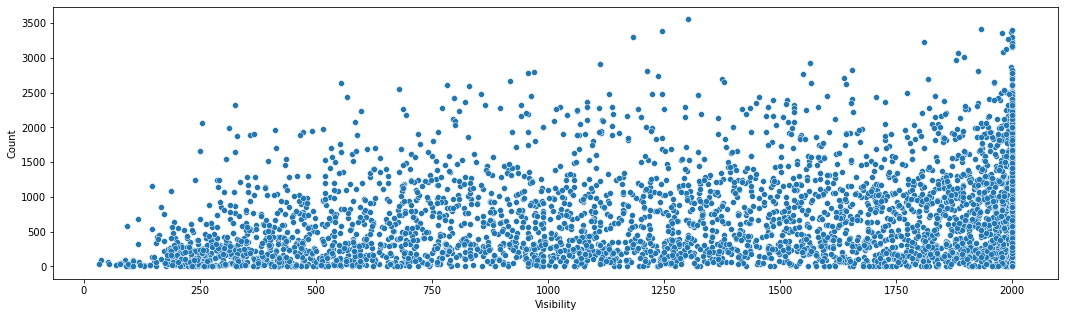

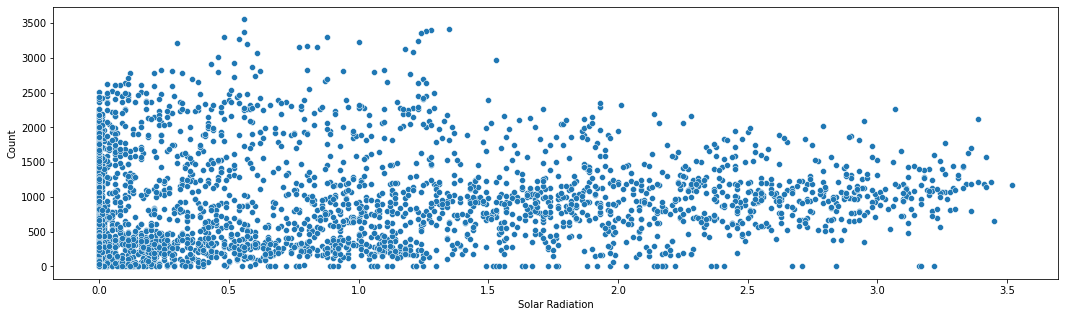

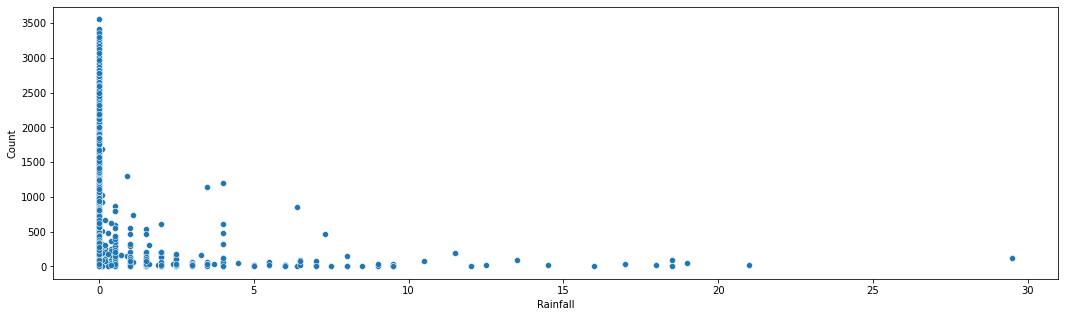

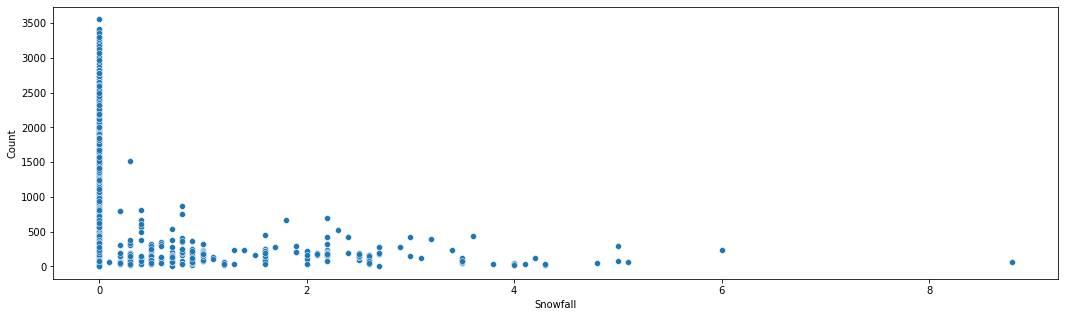

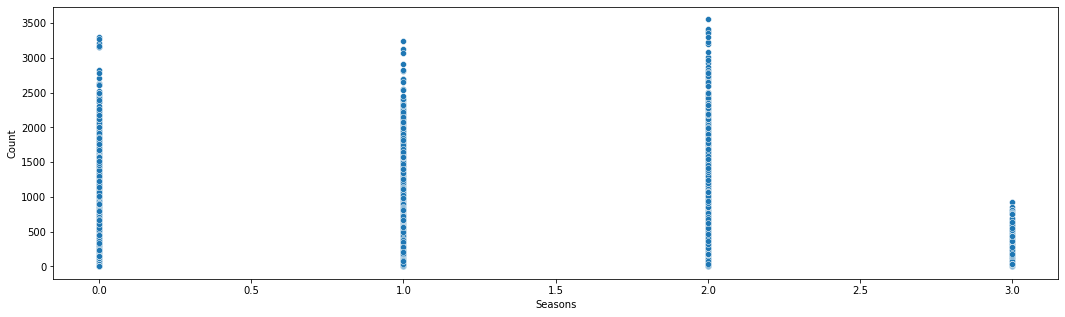

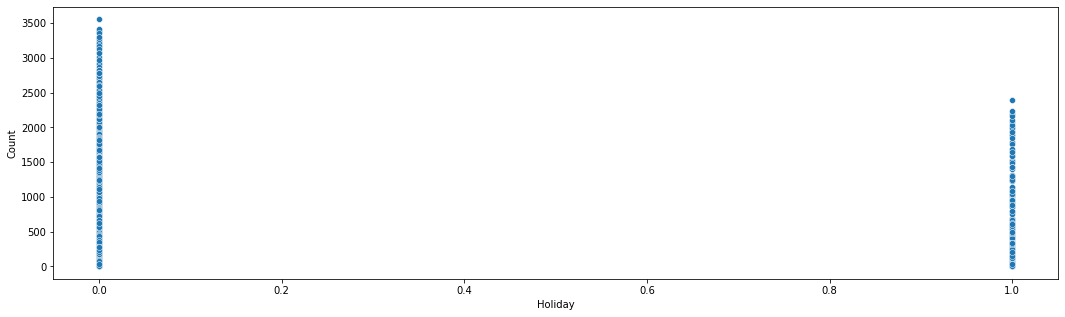

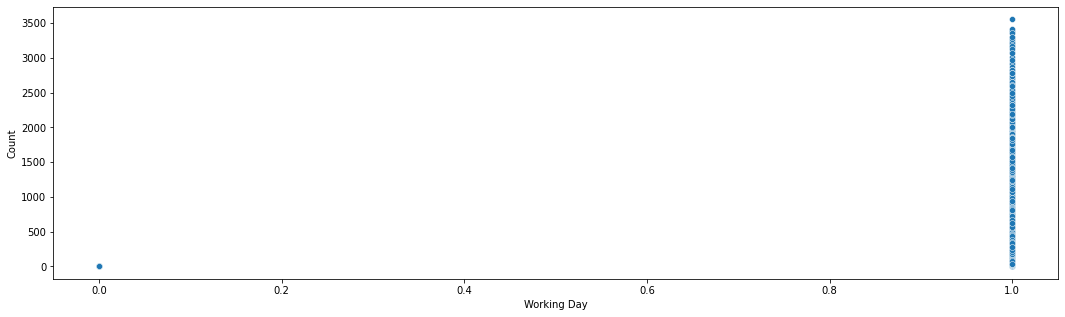

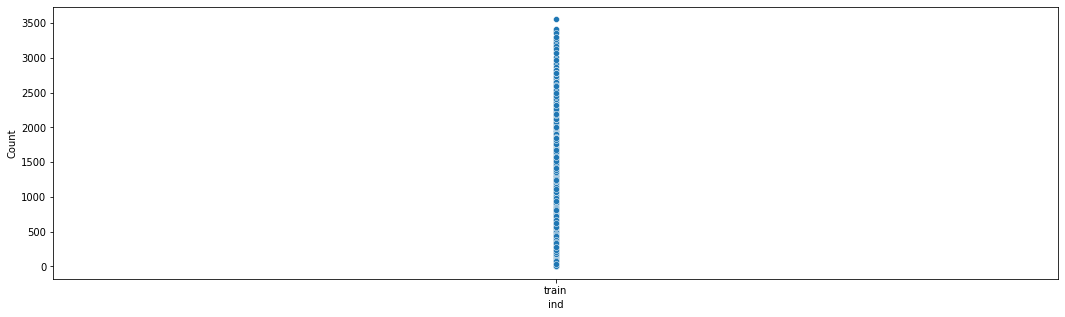

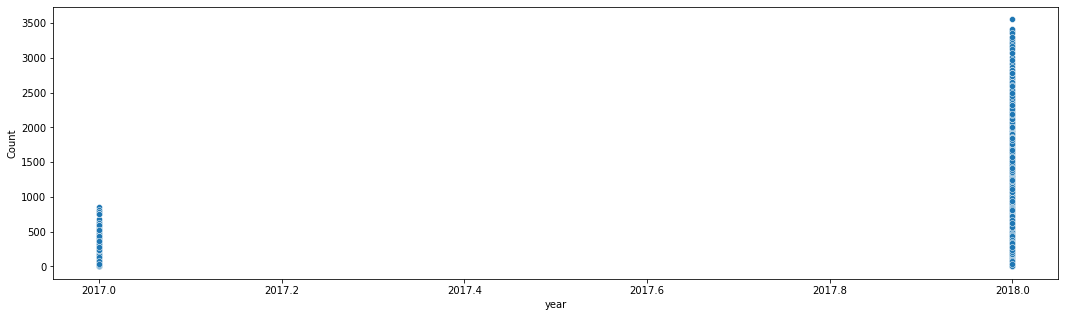

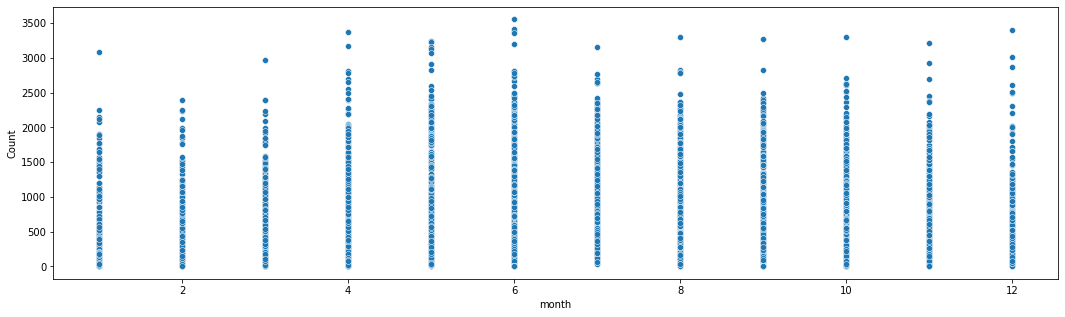

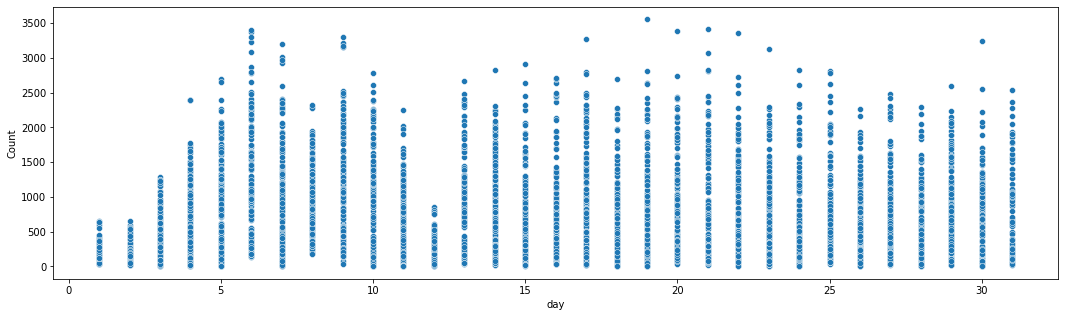

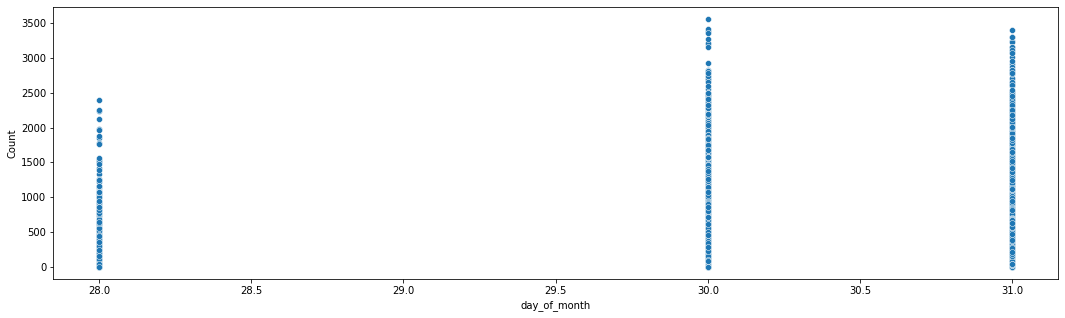

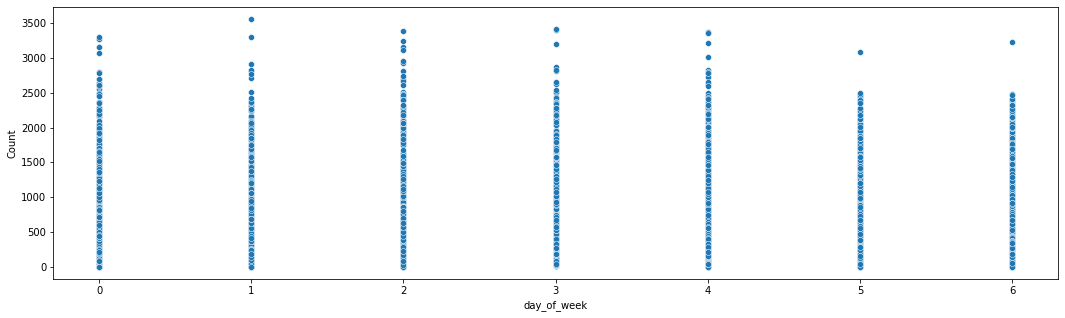

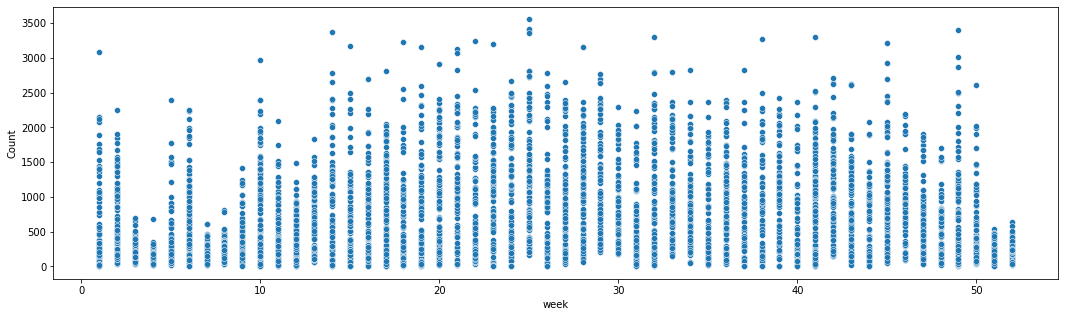

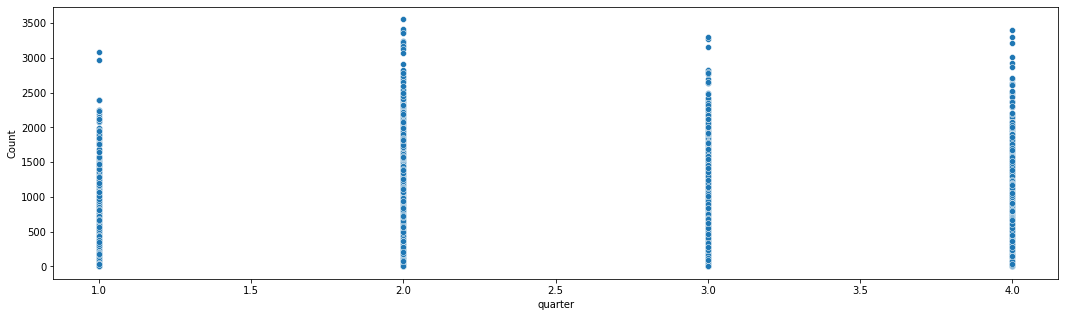

In [248]:
for col in trainplt.columns:
    plt.figure(figsize = (18,5)) 
    sns.scatterplot(x = trainplt[col],y = y)
    

In [249]:
# for col in trainplt.columns:
#     plt.figure(figsize = (18,5)) 
#     sns.lineplot(x = trainplt[col],y = y)
    

In [250]:
# # for col in trainplt.columns:
#     plt.figure(figsize = (18,5)) 
#     sns.barplot(x = trainplt[col],y = y)
    

In [251]:
label_df = label_df.drop(['year','Date'],axis = 1)

In [252]:
label_df

,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day,ind,month,day,day_of_month,day_of_week,week,quarter
id,,,,,,,,,,,,,,,,,,
4987,7.0,297.8,51,5.76,2000,1.17,0.0,0.0,2.0,0.0,1.0,test,10,6,31,5,40,4
4988,18.0,270.7,47,2.52,984,0.00,0.0,0.0,3.0,0.0,1.0,test,1,21,31,6,3,1
4989,16.0,262.6,53,6.48,1949,0.00,0.0,0.0,3.0,0.0,1.0,test,12,13,31,2,50,4
4990,0.0,275.8,45,6.12,1493,0.00,0.0,0.0,1.0,0.0,1.0,test,7,3,31,1,27,3
4991,14.0,302.0,63,15.12,1776,0.00,0.0,0.0,2.0,0.0,1.0,test,8,20,31,0,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,10.0,306.4,51,9.36,2000,0.59,0.0,0.0,2.0,0.0,1.0,train,7,21,31,5,29,3
4983,10.0,281.4,51,11.88,1977,0.01,0.0,0.0,1.0,0.0,1.0,train,3,19,31,0,12,1
4984,4.0,295.5,40,9.36,1854,2.64,0.0,0.0,0.0,1.0,1.0,train,3,10,31,5,10,1


In [253]:
label_df.isna().sum()

Hour               0
Hotness            0
Humidity           0
Wind Speed         0
Visibility         0
Solar Radiation    0
Rainfall           0
Snowfall           0
Seasons            0
Holiday            0
Working Day        0
ind                0
month              0
day                0
day_of_month       0
day_of_week        0
week               0
quarter            0
dtype: int64

In [254]:
X_trainU,X_testU = label_df[label_df['ind'].eq('train')].drop('ind',axis = 1),label_df[label_df['ind'].eq('test')].drop('ind',axis = 1)

In [255]:
# X_test

In [256]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_tr = pd.DataFrame(scaler.fit_transform(X_trainU))
X_test = pd.DataFrame(scaler.transform(X_testU))

X_tr.columns = X_trainU.columns
X_test.columns = X_testU.columns

# X_train

# label_df = scaler.fit_transform(label_df.drop("ind",axis = 1))
# final_df = pd.concat([label_df,df['ind']],axis = 1)
# final_df

In [257]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_tr, y, train_size=0.8, test_size=0.2,random_state=0)

In [258]:
# from tensorflow import keras
# from tensorflow.keras import layers, callbacks
# early_stopping = callbacks.EarlyStopping(
# min_delta=0.1, # minimium amount of change to count as an improvement
# patience=20, # how many epochs to wait before stopping
# restore_best_weights=True,
# )
# model = keras.Sequential([
# layers.Dense(500, activation='relu', input_shape=[14]),
# layers.Dense(500, activation='relu'),
# layers.Dense(500, activation='relu'),
    
# layers.Dense(500, activation='relu'),
    
# # layers.Dense(200, activation='sigmoid'),
# layers.Dense(1),
# ])
# model.compile(
# optimizer='adam',
# loss='mae',
# )

from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 1000,learning_rate=0.02, n_jobs=12)

# Fit the model
model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_val, y_val)], verbose=False)



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.02, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [259]:
# history = model.fit(
# X_train, y_train,
# validation_data=(X_val, y_val),
# batch_size=5000,
# epochs=1000,
# )
# history_df = pd.DataFrame(history.history)
# history_df.loc[:, ['loss', 'val_loss']].plot();

In [260]:
y_pred_val = model.predict(X_val)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred_val,y_val)
print(mae)

120.99936875718868


In [261]:
#mae = 123.43141869268938

In [262]:
pred = model.predict(X_test)
pred

array([1889.1227  ,   45.077854,  143.11948 , ...,  688.562   ,
        280.08713 ,  825.4624  ], dtype=float32)

In [263]:
test

,Date,Hour,Hotness,Humidity,Wind Speed,Visibility,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day
id,,,,,,,,,,,,
4987,10/06/2018,16:00,297.8,51,5.76,2000,1.17,0.0,0.0,Summer,NO,YES
4988,21/01/2018,4:00,270.7,47,2.52,984,0.00,0.0,0.0,Winter,NO,YES
4989,13/12/2017,2:00,262.6,53,6.48,1949,0.00,0.0,0.0,Winter,NO,YES
4990,07/03/2018,0:00,275.8,45,6.12,1493,0.00,0.0,0.0,Spring,NO,YES
4991,20/08/2018,22:00,302.0,63,15.12,1776,0.00,0.0,0.0,Summer,NO,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
8756,12/09/2018,8:00,291.2,56,5.40,1994,0.62,0.0,0.0,Autumn,NO,YES
8757,31/07/2018,16:00,310.0,38,4.32,2000,2.07,0.0,0.0,Summer,NO,YES
8758,22/03/2018,15:00,283.7,34,16.20,1850,2.51,0.0,0.0,Spring,NO,YES


In [264]:
submit = pd.DataFrame({'id':test.index,'Count':pred.flatten().round()})


In [265]:
submit.to_csv('SubmissionCassandra7.csv',index = False)